<a href="https://colab.research.google.com/github/MohamedKKhalaf/Robotics/blob/main/Robotics_shortest_path_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
map=np.zeros(1000000)
map=map.reshape(1000,1000)

In [ ]:
def obstacle(map,a,b,c,d,value):
  for i in range(len(map)):
    for j in range(len(map[i])):
      if i >=a and i<=b and j>=c and j<=d:
        map[i][j]=1
  return map

In [ ]:
map=obstacle(map,0,200,800,999,1)
map=obstacle(map,200,999,400,600,1)
map=obstacle(map,0,400,200,300,1)

start=(10,10)
goal=(950,950)

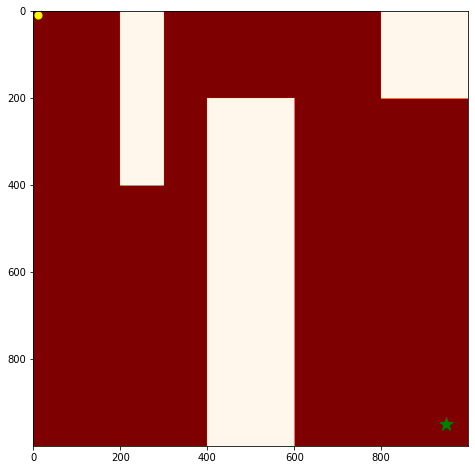

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(map, cmap=plt.cm.OrRd_r)

ax.scatter(start[1],start[0], marker = ".", color = "yellow", s = 200)

ax.scatter(goal[1],goal[0], marker = "*", color = "green", s = 200)

plt.show()

In [ ]:
def heuristic(a, b):

    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

In [ ]:
import heapq

def astar(array, start, goal):

    neighbors = [(0,10),(10,0),(-10,0)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))

    while oheap:
        current = heapq.heappop(oheap)[1]

        if current == goal:
            data = []

            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)

        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue

                else:
                    # array bound y walls
                    continue

            else:
                # array bound x walls
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))

In [ ]:
route = astar(map, start, goal)
route = route + [start]
print(route)

[(950, 950), (940, 950), (940, 940), (930, 940), (930, 930), (920, 930), (920, 920), (910, 920), (910, 910), (900, 910), (900, 900), (890, 900), (890, 890), (880, 890), (880, 880), (870, 880), (870, 870), (860, 870), (860, 860), (850, 860), (850, 850), (840, 850), (840, 840), (830, 840), (830, 830), (820, 830), (820, 820), (810, 820), (810, 810), (800, 810), (800, 800), (790, 800), (790, 790), (780, 790), (780, 780), (770, 780), (770, 770), (760, 770), (760, 760), (750, 760), (750, 750), (740, 750), (740, 740), (730, 740), (730, 730), (720, 730), (720, 720), (710, 720), (710, 710), (700, 710), (700, 700), (690, 700), (690, 690), (680, 690), (680, 680), (670, 680), (670, 670), (660, 670), (660, 660), (650, 660), (650, 650), (640, 650), (640, 640), (630, 640), (630, 630), (620, 630), (620, 620), (610, 620), (610, 610), (600, 610), (590, 610), (580, 610), (570, 610), (560, 610), (550, 610), (540, 610), (530, 610), (520, 610), (510, 610), (500, 610), (490, 610), (480, 610), (470, 610), (46

In [ ]:
route = route[::-1]
print(route)

[(10, 10), (10, 20), (20, 20), (20, 30), (30, 30), (30, 40), (40, 40), (40, 50), (50, 50), (50, 60), (60, 60), (60, 70), (70, 70), (70, 80), (80, 80), (80, 90), (90, 90), (90, 100), (100, 100), (100, 110), (110, 110), (110, 120), (120, 120), (120, 130), (130, 130), (130, 140), (140, 140), (140, 150), (150, 150), (150, 160), (160, 160), (160, 170), (170, 170), (170, 180), (180, 180), (180, 190), (190, 190), (200, 190), (210, 190), (220, 190), (230, 190), (240, 190), (250, 190), (260, 190), (270, 190), (280, 190), (290, 190), (300, 190), (310, 190), (320, 190), (330, 190), (340, 190), (350, 190), (360, 190), (370, 190), (380, 190), (390, 190), (400, 190), (410, 190), (410, 200), (410, 210), (410, 220), (410, 230), (410, 240), (410, 250), (410, 260), (410, 270), (410, 280), (410, 290), (410, 300), (410, 310), (410, 320), (410, 330), (410, 340), (410, 350), (410, 360), (410, 370), (410, 380), (410, 390), (400, 390), (390, 390), (380, 390), (370, 390), (360, 390), (350, 390), (340, 390), (3

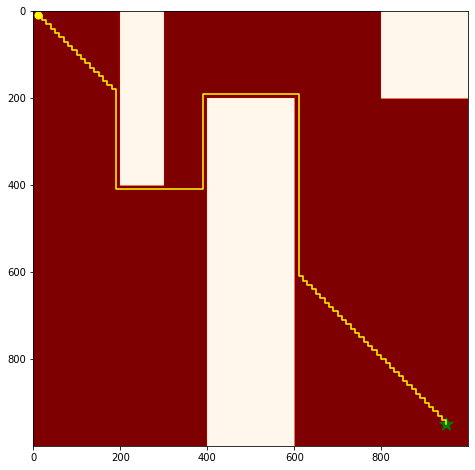

In [ ]:
x_coords = []

y_coords = []

for i in (range(0,len(route))):

    x = route[i][0]

    y = route[i][1]

    x_coords.append(x)

    y_coords.append(y)

# plot map and path

fig, ax = plt.subplots(figsize=(8,8))

ax.imshow(map, cmap=plt.cm.OrRd_r)

ax.scatter(start[1],start[0], marker = ".", color = "yellow", s = 200)

ax.scatter(goal[1],goal[0], marker = "*", color = "green", s = 200)

ax.plot(y_coords,x_coords, color = "yellow")

plt.show()